# Document Loading

## Retrieval augmented generation
 
উপযুক্ত তথ্য সংগ্রহ করে মডেলের প্রম্পটে সন্নিবেশ করানোর প্রক্রিয়াটি Retrieval Augmented Generation (RAG) নামে পরিচিত। 

LangChain-এর মধ্যে রয়েছে বিভিন্ন উপাদান যা Q&A অ্যাপ্লিকেশন এবং সাধারণভাবে RAG অ্যাপ্লিকেশন তৈরি করতে সহায়তা করে।

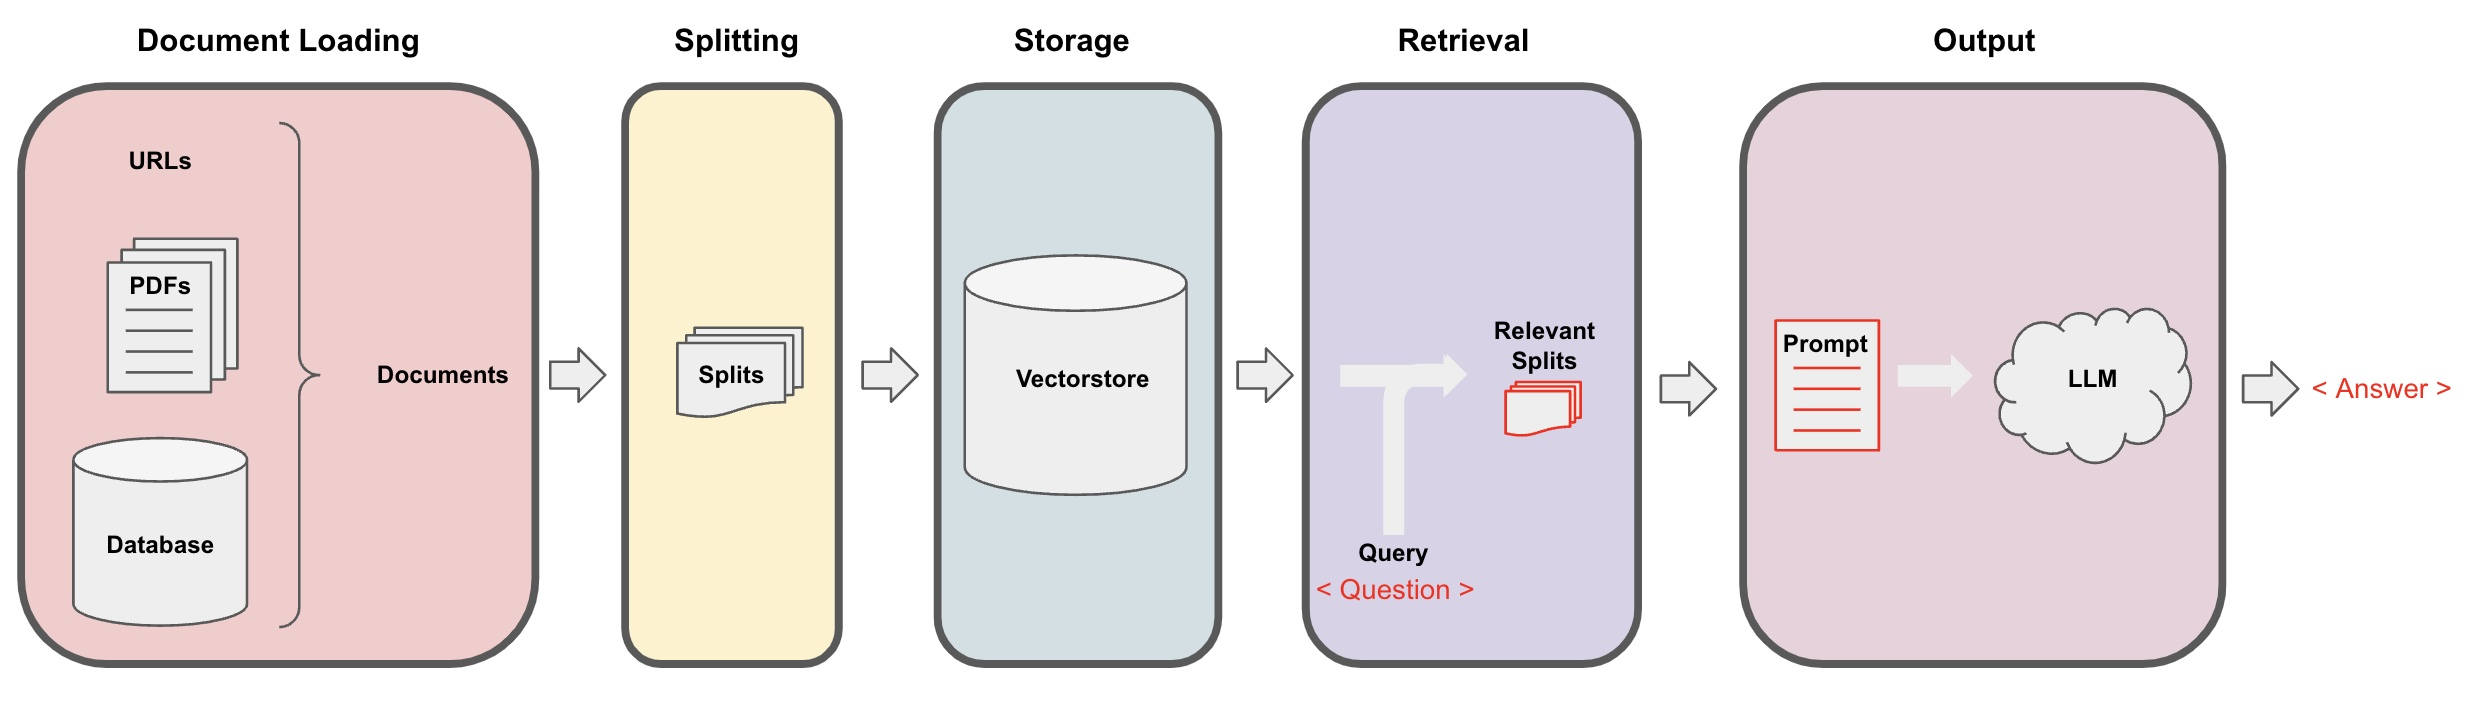

In [1]:
#! pip install langchain

## PDFs

Let's load a PDF [universe](https://www.muslim-library.com/dl/books/English_THE_CREATION_OF_THE_UNIVERSE.pdf)

In [73]:
# The course will show the pip installs you would need to install packages on your own machine.
# These packages are already installed on this platform and should not be run again.
#! pip install pypdf 

In [11]:
from langchain.document_loaders import PyPDFLoader
loader = PyPDFLoader("English_THE_CREATION_OF_THE_UNIVERSE.pdf")
pages1 = loader.load()

In [11]:
# from langchain.document_loaders import PyPDFLoader

# # Load PDF
# loaders = [
#     # Duplicate documents on purpose - messy data
#     PyPDFLoader("English_THE_CREATION_OF_THE_UNIVERSE.pdf"),
#     PyPDFLoader("universe.pdf") #add all document of your needs  
# ]

# docs = []
# for loader in loaders:
#     docs.extend(loader.load())

Each page is a `Document`.

A `Document` contains text (`page_content`) and `metadata`.

In [12]:
len(pages1)

210

In [13]:
page1 = pages1[100]

In [14]:
print(page1.page_content[0:1000])

mosphere of Earth is specially created to support life in a number of cru-
cial ways.
The atmosphere of Earth is composed of 77% nitrogen, 21% oxygen,
and 1% carbon dioxide. Let's start with the most important gas: oxygen.Oxygen is vitally important to life because it enters into most of the chem-ical reactions that release the energy that all complex life-forms require.
Carbon compounds react with oxygen. As a result of these reactions,
water, carbon dioxide, and energy are produced. Small "bundles" of ener-gy that are called ATP (adenosine triphosphate) and are used in living cellsare generated by these reactions. This is why we constantly need oxygento live and why we breathe to satisfy that need.
The interesting aspect of this business is that the percentage of oxygen
in the air we breathe is very precisely determined. Michael Denton writeson this point:
Could your atmosphere contain more oxygen and still support life? No!Oxygen is a very reactive element. Even the current percenta

In [15]:
page1.metadata

{'source': 'English_THE_CREATION_OF_THE_UNIVERSE.pdf', 'page': 100}

## URLs

In [16]:
from langchain.document_loaders import WebBaseLoader
loader = WebBaseLoader("https://www.deeplearning.ai/the-batch/issue-244/")

In [17]:
# #multi url loading
# from langchain.document_loaders import WebBaseLoader
# loader = WebBaseLoader(["https://www.deeplearning.ai/the-batch/issue-244/","https://www.deeplearning.ai/the-batch/issue-245/"])
# docs = loader.load()
# print(docs[0].page_content[:500])

In [17]:
docs = loader.load()

In [19]:
print(docs[0].page_content[:1000])

Autonomous Coding Agents, Instability at Stability AI, Mamba Mania, and moreğŸŒŸ New Course! Enroll in AI Agentic Design Patterns with AutoGenCoursesShort CoursesSpecializationsAI NewsletterThe BatchAndrew's LetterData PointsML ResearchBlogCommunityForumEventsAmbassadorsAmbassador SpotlightResourcesCompanyAboutCareersContactStart LearningWeekly IssuesAndrew's LettersData PointsML ResearchBusinessScienceAI & SocietyCultureHardwareAI CareersAboutSubscribeThe BatchWeekly Issuesissue 244PublishedApr 10, 2024Reading time13 min readPublishedApr 10, 2024Reading time13 min readShareDear friends,Planning is a key agentic AI design pattern in which we use a large language model (LLM) to autonomously decide on what sequence of steps to execute to accomplish a larger task. For example, if we ask an agent to do online research on a given topic, we might use an LLM to break down the objective into smaller subtasks, such as researching specific subtopics, synthesizing findings, and compiling a report

In [20]:
#print all data
from langchain.schema import Document
texts = [(doc.page_content) for doc in docs]

# Wrap cleaned texts back into Document objects
documents = [Document(page_content=text) for text in texts]

print(documents)

[Document(page_content='Autonomous Coding Agents, Instability at Stability AI, Mamba Mania, and moreğŸŒŸ New Course! Enroll in AI Agentic Design Patterns with AutoGenCoursesShort CoursesSpecializationsAI NewsletterThe BatchAndrew\'s LetterData PointsML ResearchBlogCommunityForumEventsAmbassadorsAmbassador SpotlightResourcesCompanyAboutCareersContactStart LearningWeekly IssuesAndrew\'s LettersData PointsML ResearchBusinessScienceAI & SocietyCultureHardwareAI CareersAboutSubscribeThe BatchWeekly Issuesissue 244PublishedApr 10, 2024Reading time13 min readPublishedApr 10, 2024Reading time13 min readShareDear friends,Planning is a key\xa0agentic AI design pattern\xa0in which we use a large language model (LLM) to autonomously decide on what sequence of steps to execute to accomplish a larger task. For example, if we ask an agent to do online research on a given topic, we might use an LLM to break down the objective into smaller subtasks, such as researching specific subtopics, synthesizing 

# Loading website all data with base URL

In [21]:
from langchain_community.document_loaders.recursive_url_loader import RecursiveUrlLoader
url = "https://islamqa.info/bn"
loader = RecursiveUrlLoader(url=url)
docs = loader.load()
len(docs)

C:\Users\Computer Care\anaconda3\Lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


57

In [22]:
docs[0].page_content[:5000]

'<!doctype html>\n<html lang="bn">\n<head>\n    <meta charset="UTF-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n    <meta name="csrf-token" content="GvOdhGWxBTPAB9PF8ULJvwBBpMbPRaVkulgtz4yP">\n    <link rel="icon" href="/favicon.svg" type="image/svg+xml" sizes="any">\n    <link rel="alternate" type="application/rss+xml" title="RSS Feed for islamqa.info"\n          href="https://islamqa.info/bn/rss.xml"/>\n\n\n    <title>ইসলাম জিজ্ঞাসা ও জবাব</title><meta name="description" content="ইসলাম জিজ্ঞাসা ও জবাব ওয়েবসাইট একটি দাওয়াতি, গবেষণাধর্মী ও শিক্ষামূলক ওয়েবসাইট। এর লক্ষ্য হচ্ছে&ndash; ইসলাম সম্পর্কিত প্রশ্নাবলির গবেষণানির্ভর, দলিলভিত্তিক এবং যতদূর সম্ভব বিস্তারিত ও সহজভাষায় উত্তর প্রদান। প্রদত্ত উত্তরগুলোর তত্ত্বাবধান করেন শাইখ মুহাম্মদ সালেহ আল-মুনাজ্জিদ (হাফিযাহুল্লাহ্&zwnj;)।এ ওয়েবসাইট মুসলিম-অমুসলিম সকল প্রশ্নকারীর ইসলামি শরিয়া সম্পর্কিত কিংবা মনস্তাত্বিক ও সামাজিক যে কোন প্রশ্নকে স্

In [23]:
docs[-1].metadata

{'source': 'https://islamqa.info/bn/change-language',
 'content_type': 'text/html; charset=UTF-8',
 'title': 'ইসলাম জিজ্ঞাসা ও জবাব',
 'description': 'ইসলাম জিজ্ঞাসা ও জবাব ওয়েবসাইট একটি দাওয়াতি, গবেষণাধর্মী ও শিক্ষামূলক ওয়েবসাইট। এর লক্ষ্য হচ্ছে– ইসলাম সম্পর্কিত প্রশ্নাবলির গবেষণানির্ভর, দলিলভিত্তিক এবং যতদূর সম্ভব বিস্তারিত ও সহজভাষায় উত্তর প্রদান। প্রদত্ত উত্তরগুলোর তত্ত্বাবধান করেন শাইখ মুহাম্মদ সালেহ আল-মুনাজ্জিদ (হাফিযাহুল্লাহ্\u200c)।এ ওয়েবসাইট মুসলিম-অমুসলিম সকল প্রশ্নকারীর ইসলামি শরিয়া সম্পর্কিত কিংবা মনস্তাত্বিক ও সামাজিক যে কোন প্রশ্নকে স্বাগত জানায়।',
 'language': 'bn'}

# Cleaning

In [24]:
from langchain.schema import Document
import re
import json

def deep_clean_text(text):
    """
    Deep cleans text by removing HTML tags, scripts, extra whitespace, unnecessary characters,
    JavaScript code snippets, jQuery codes, and converts JSON strings to Python dictionaries (if applicable).

    Args:
        text (str): The text to be cleaned.

    Returns:
        str: The deep cleaned text.
    """
    # Remove HTML tags
    text = re.sub(r'<[^>]*>', '', text)
    
    # Remove script blocks (including JavaScript and JSON-like blocks)
    text = re.sub(r'<script.*?</script>', '', text, flags=re.DOTALL)
    text = re.sub(r'{[^{}]*}', '', text)

    # Remove JavaScript code snippets
    js_patterns = [
        r'\(function\(.*?\)\s*{[\s\S]*?}\)\(.*?\);',  # Matches immediately invoked function expressions (IIFE)
        r'jQuery\(document\)\.ready\(.*?;\s*{[\s\S]*?}\);',  # Matches jQuery document ready functions
        r'jQuery\(.*?\)\.[\s\S]*?;',  # Matches jQuery selectors and methods
        r'\$\(function\(.*?\)\s*{[\s\S]*?}\);',  # Matches jQuery document ready functions using shorthand
        r'window\..*?;',  # Matches window object assignments
        r'var .*?;',  # Matches variable declarations
        r'function .*?{[\s\S]*?}',  # Matches function declarations
        r'//.*?\n',  # Matches single line comments
        r'/\*[\s\S]*?\*/',  # Matches multi-line comments
    ]
    for pattern in js_patterns:
        text = re.sub(pattern, '', text, flags=re.DOTALL)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove unnecessary characters
    text = re.sub(r'[\t\r\n\u2028\u2029]', '', text)

    # Attempt to parse JSON strings and pretty-print them if possible
    try:
        text_as_dict = json.loads(text)
        if isinstance(text_as_dict, dict):
            text = json.dumps(text_as_dict, indent=4, ensure_ascii=False)
    except json.JSONDecodeError:
        pass

    return text

# Clean the text content of the documents
cleaned_texts = [deep_clean_text(doc.page_content) for doc in docs]

# Wrap cleaned texts back into Document objects
cleaned_documents = [Document(page_content=text) for text in cleaned_texts]

print(cleaned_documents)


[Document(page_content='ইসলাম জিজ্ঞাসা ও জবাব বৃহস্পতিবার 22 যুলক্বদ 1445 - 30 মে 2024 বাংলা প্রবেশ Тоҷикӣ Uygur 中文 Portuguese German हिन्दी فارسی Español Русский বাংলা اردو Français Türkçe Indonesian English العربية প্রশ্নোত্তর খুঁজুন বাংলা প্রশ্নোত্তর খুঁজুন ক্যাটাগরি প্রশ্ন পাঠান নতুন প্রশ্নোত্তর ইসলামকে জানুন ওয়েবসাইট সম্পর্কে ব্যবহার নির্দেশিকা নতুন প্রশ্নোত্তর তিনি কি ইনভেস্টমেন্ট সার্টিফিকেটগুলো বাতিল করে দিবেন; এই ইনভেস্টমেন্ট হারাম মর্মে ফতোয়া ইস্যু হওয়ার পর? পুরাতন মুনাফাগুলোর হুকুম কি হবে? 30-05-2024 সুন্নত পদ্ধতি কি দুই হাতে মুসাফাহা করা? 20-05-2024 বিদআতের সংজ্ঞা কী, তারাবীর নামাযের সংখ্যা বৃদ্ধির হুকুম কী? 14-05-2024 স্যালাইন, ভিটামিন ইনজেকশন ও শিরাতে পুশকৃত ইনজেকশন কি রোযা নষ্ট করবে? 13-05-2024 যদি মুদ্রার দর পরিবর্তন হয়ে যায় সেক্ষেত্রে ঋণ আদায়ের পদ্ধতি কী হবে? 12-05-2024 “ইয়া মুহাম্মদ” বলা কিংবা “হায় মুহাম্মদ” বলা কি শির্ক? 10-05-2024 ক্রেতার সম্পদ হারাম হওয়ার সম্ভাবনা থাকা সত্ত্বেও বিক্রি করা 08-05-2024 "তোমাদের মধ্যে যার সামর্থ্য আছে তার উচিত বিবাহ করা" শীর্ষক হাদিসের

# Youtube Video Loading

In [25]:
from langchain_community.document_loaders import SeleniumURLLoader
urls = [
    "https://youtu.be/8bm315fPcI8"
]

In [26]:
loader = SeleniumURLLoader(urls=urls)

In [27]:
data = loader.load()

In [28]:
print(data[:500])

[Document(page_content='•\n              \n            \n          \n        \n        \n          \n            \n          \n        \n      \n    \n    NaN / NaN\n\nNaN / NaN\n\nNaN / NaN\n\nNaN / NaN\n\nNaN / NaN\n\nBD\n\nনেভিগেশান এড়িয়ে যান\n\nসার্চ করুন\n\nআপনার ভয়েসের মাধ্যমে সার্চ করুন\n\nBD\n\nAI মানব জাতির ভবিষ্যৎ কোথায় নিয়ে যাবে ?\n\nসার্চ করুন\n\nতথ্য\n\nShopping\n\nপরে দেখুন\n\nশেয়ার করুন\n\nলিঙ্ক কপি করুন\n\nআনমিউট করতে ট্যাপ করুন\n\n২ গুণ\n\nপ্লেব্যাক অল্প সময়ের মধ্যে শুরু না হলে, আপনার ডিভাইস পুনঃসূচনা করে চেষ্টা করুন।\n\nপরের ভিডিও\n\nলাইভআসন্ন\n\nএখনই চালান\n\nKi Keno Kivabe\n\nসদস্যতা নিন\n\nসদস্যতা নেওয়া হয়েছে\n\nপ্রতিদিন আমাদের মাথায় অসংখ্য প্রশ্ন ঘুরতে থাকে। কিছু প্রশ্ন শুধুই কৌতুহল, আর কিছু প্রশ্নের উত্তর জানাটা আমাদের খুব জরুরী। কি কেন কিভাবে টিম মনে করে অজানাকে জানার ইচ্ছেটাই সবচেয়ে গুরুত্বপূর্ণ।\n\nমনের সকল জিজ্ঞাসা আর কৌতুহল মেটাতে অজানাকে জানার যাত্রায় আমাদের সঙ্গী হতে পারেন আপনিও।\n\n💡 সাবস্ক্রাইব করুন\nঅজানাকে জানার যাত্রা শুরু হোক এখনই.. .. ..\n\nব্

In [29]:
from langchain.schema import Document
import re
import json

def deep_clean_text(text):
    """
    Deep cleans text by removing HTML tags, scripts, extra whitespace, unnecessary characters,
    JavaScript code snippets, jQuery codes, and converts JSON strings to Python dictionaries (if applicable).

    Args:
        text (str): The text to be cleaned.

    Returns:
        str: The deep cleaned text.
    """
    # Remove HTML tags
    text = re.sub(r'<[^>]*>', '', text)
    
    # Remove script blocks (including JavaScript and JSON-like blocks)
    text = re.sub(r'<script.*?</script>', '', text, flags=re.DOTALL)
    text = re.sub(r'{[^{}]*}', '', text)

    # Remove JavaScript code snippets
    js_patterns = [
        r'\(function\(.*?\)\s*{[\s\S]*?}\)\(.*?\);',  # Matches immediately invoked function expressions (IIFE)
        r'jQuery\(document\)\.ready\(.*?;\s*{[\s\S]*?}\);',  # Matches jQuery document ready functions
        r'jQuery\(.*?\)\.[\s\S]*?;',  # Matches jQuery selectors and methods
        r'\$\(function\(.*?\)\s*{[\s\S]*?}\);',  # Matches jQuery document ready functions using shorthand
        r'window\..*?;',  # Matches window object assignments
        r'var .*?;',  # Matches variable declarations
        r'function .*?{[\s\S]*?}',  # Matches function declarations
        r'//.*?\n',  # Matches single line comments
        r'/\*[\s\S]*?\*/',  # Matches multi-line comments
    ]
    for pattern in js_patterns:
        text = re.sub(pattern, '', text, flags=re.DOTALL)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove unnecessary characters
    text = re.sub(r'[\t\r\n\u2028\u2029]', '', text)

    # Attempt to parse JSON strings and pretty-print them if possible
    try:
        text_as_dict = json.loads(text)
        if isinstance(text_as_dict, dict):
            text = json.dumps(text_as_dict, indent=4, ensure_ascii=False)
    except json.JSONDecodeError:
        pass

    return text

# Clean the text content of the documents
cleaned_texts = [deep_clean_text(doc.page_content) for doc in data]

# Wrap cleaned texts back into Document objects
cleaned_documents = [Document(page_content=text) for text in cleaned_texts]

print(cleaned_documents)

[Document(page_content='• NaN / NaN NaN / NaN NaN / NaN NaN / NaN NaN / NaN BD নেভিগেশান এড়িয়ে যান সার্চ করুন আপনার ভয়েসের মাধ্যমে সার্চ করুন BD AI মানব জাতির ভবিষ্যৎ কোথায় নিয়ে যাবে ? সার্চ করুন তথ্য Shopping পরে দেখুন শেয়ার করুন লিঙ্ক কপি করুন আনমিউট করতে ট্যাপ করুন ২ গুণ প্লেব্যাক অল্প সময়ের মধ্যে শুরু না হলে, আপনার ডিভাইস পুনঃসূচনা করে চেষ্টা করুন। পরের ভিডিও লাইভআসন্ন এখনই চালান Ki Keno Kivabe সদস্যতা নিন সদস্যতা নেওয়া হয়েছে প্রতিদিন আমাদের মাথায় অসংখ্য প্রশ্ন ঘুরতে থাকে। কিছু প্রশ্ন শুধুই কৌতুহল, আর কিছু প্রশ্নের উত্তর জানাটা আমাদের খুব জরুরী। কি কেন কিভাবে টিম মনে করে অজানাকে জানার ইচ্ছেটাই সবচেয়ে গুরুত্বপূর্ণ। মনের সকল জিজ্ঞাসা আর কৌতুহল মেটাতে অজানাকে জানার যাত্রায় আমাদের সঙ্গী হতে পারেন আপনিও। 💡 সাবস্ক্রাইব করুন অজানাকে জানার যাত্রা শুরু হোক এখনই.. .. .. ব্ল্যাক ফ্রাইডে আসলে কী ?8:41 Ki Keno Kivabe সদস্যতা নিন সদস্যতা নেওয়া হয়েছে আপনি সাইন-আউট করেছেন আপনার দেখা ভিডিওগুলি টিভির দেখার ইতিহাসে যোগ করা হতে পারে এবং তার ভিত্তিতে আপনি টিভিতে বিভিন্ন ধরনের সাজেশন পাবেন। এটি এড়

# Youtube trascribe

In [1]:
from langchain_community.document_loaders import YoutubeLoader

In [2]:
loader = YoutubeLoader.from_youtube_url(
    "https://youtu.be/2SMaVPl7nV8", add_video_info=True
)

In [3]:
data = loader.load()

In [9]:
print(data[:2000])

[Document(page_content="we all have been there you're chatting with\xa0\nsomeone hey how are you and you're getting\xa0\xa0 these minutes long voice messages basically\xa0\nthey're offputting the work CL on you it's\xa0\xa0 easy to ramble around to make a long message but\xa0\nyou have to hear it and extract the important\xa0\xa0 information for yourself instead of them putting\xa0\ntheir thoughts in a concise message it's okay if\xa0\xa0 it happens sometimes but if it keeps occurring\xa0\nit's annoying so what if you could build a lang\xa0\xa0 chain voice transcriber that summarizes the\xa0\nmessage so you don't have to sit there all\xa0\xa0 the time time and listen to all those messages but\xa0\nstill get the information if you're interested how\xa0\xa0 we going to build this with L chain and a telegram\xa0\nboard and keep watching hello my name is Leon and\xa0\xa0 welcome to my Channel today I want to tackle this\xa0\nproblem of annoyingly long voice messages or maybe\xa0\xa0 you ju

In [53]:
#multi urls
from langchain_community.document_loaders import YoutubeLoader
import io
urls=["https://www.youtube.com/watch?time_continue=1&v=CO6tSmZgfH4","https://www.youtube.com/watch?v=eIBPZfls2sA"]
for url in urls:
    loader=YoutubeLoader.from_youtube_url(url)
    docs=loader.load()
    name=url.split("=")[1]
    with io.open(name+".txt","w",encoding="utf-8")as f1:
        for doc in docs:
            f1.write(doc.page_content)
        f1.close()

In [52]:
print(doc)

page_content="[Music] foreign [Music] what's up guys this is Loni welcome back to our Channel Total technology and welcome to the brand new uh tutorial um uh series and the name is actually AI affiliate marketing with python and this will help you to actually automate uh your marketing strategies to boost your earnings so basically um let me actually uh clear something so this tutorial in this tutorial I'll be not going to actually uh showcase you any marketing strategies uh like dedicatedly but I'll be going to actually uh show you guys uh how to actually use Python and AI to actually automate your marketing strategies I'm not going to teach you the marketing strategies here I am expecting or I'm assuming you already know the concept of marketing digital marketing content marketing email marketing everything but I'll actually show you how to actually automate all those strategies or maybe I'll actually help you to actually uh add up some new strategies with the help of AI and automati

In [55]:
loader = YoutubeLoader.from_youtube_url(
    "https://youtu.be/8bm315fPcI8",
    add_video_info=False,
    language=["bn", "id"],
    translation="bn",
)
loader.load()

[Document(page_content='[মিউজিক] সিইও স্যাম আলমান কৃত্রিম এর জন্য খোলা সিইও [মিউজিক] স্যাম [মিউজিক] স্যাম ডিরেক্টর মাইক্রোসফ্ট সিই স্যাম কৃত্রিম বুদ্ধিমত্তা উন্মুক্ত সিইও ইন্টারনেট আল জর্জ সেন্টার সুরক্ষা এবং উদীয়মান প্রযুক্তির জন্য [মিউজিক] ইনেল ইন্টেলিজেন্স এর জন্য [মিউজিক] ফোরার জন্য for [মিউজিক] স্মার্ট ফর [মিউজিক] ফেসবুক ফেসবুক [মিউজিক] ক্লিক করুন', metadata={'source': '8bm315fPcI8'})]

# Youtube videos Title, Description and Keyword loader

# Title

In [ ]:
import yt_dlp

def get_video_title(video_url):
    """Fetches and returns video title from a YouTube URL using yt-dlp."""
    ydl_opts = {
        'quiet': True,
        'skip_download': True,
        'extract_flat': True,
        'writeinfojson': True,
    }
    
    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        info = ydl.extract_info(video_url, download=False)
        
        title = info.get('title', 'N/A')
        
        return title

# Function to get video URLs from a channel page using yt-dlp
def get_channel_video_urls(channel_url):
    ydl_opts = {
        'quiet': True,
        'extract_flat': 'in_playlist',
    }

    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        channel_info = ydl.extract_info(channel_url, download=False)
    
    video_urls = [f"https://www.youtube.com/watch?v={entry['id']}" for entry in channel_info['entries']]
    return video_urls

# Target YouTube channel URL (replace with the desired channel)
channel_url = 'https://www.youtube.com/@MrBeast/videos'

# Get video URLs from the channel page
video_urls = get_channel_video_urls(channel_url)

# Fetch details for each video
video_titles = []
for video_url in video_urls:  # Limiting to first 10 videos for demonstration
    title = get_video_title(video_url)
    if title:
        video_titles.append(title)

# Print the collected information in a clear and organized way
print("**Collected YouTube Titles:**")
for i, title in enumerate(video_titles):
    print(f"\n**Video {i+1} Title:** {title}")


# Title Spliting

In [7]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

def split_titles(titles):
    """Splits a list of titles into chunks using RecursiveCharacterTextSplitter."""
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
    title_chunks = []
    for title in titles:
        chunks = text_splitter.split_text(title)
        title_chunks.append(chunks)
    return title_chunks

# Split titles into chunks
splits = split_titles(video_titles)

# Print the collected information in a clear and organized way
for i, chunk in enumerate(splits):
    print(f"\n**Chunk {i+1}:**")
    for j, splits in enumerate(chunk):
        print(f"{splits}")

**Collected YouTube Titles:**

**Chunk 1:**
$10,000 Every Day You Survive In The Wilderness

**Chunk 2:**
Protect The Yacht, Keep It!

**Chunk 3:**
In 10 Minutes This Room Will Explode!

**Chunk 4:**
Ages 1 - 100 Decide Who Wins $250,000

**Chunk 5:**
7 Days Stranded On An Island

**Chunk 6:**
Protect The Lamborghini, Keep It!

**Chunk 7:**
I Survived 7 Days In An Abandoned City

**Chunk 8:**
Face Your Biggest Fear To Win $800,000

**Chunk 9:**
$1 vs $250,000,000 Private Island!

**Chunk 10:**
Protect $500,000 Keep It!


In [8]:
len(splits)

25

# Title and description

In [34]:
import yt_dlp

def get_video_details(video_url):
    """Fetches and returns video details (title, description) from a YouTube URL using yt-dlp."""
    ydl_opts = {
        'quiet': True,
        'skip_download': True,
    }
    
    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        info = ydl.extract_info(video_url, download=False)
        
        title = info.get('title', 'N/A')
        description = info.get('description', 'N/A')

        return {
            'title': title,
            'description': description,
        }

# Function to get video URLs from a channel page using yt-dlp
def get_channel_video_urls(channel_url):
    ydl_opts = {
        'quiet': True,
        'extract_flat': 'in_playlist',
    }

    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        channel_info = ydl.extract_info(channel_url, download=False)
    
    video_urls = [f"https://www.youtube.com/watch?v={entry['id']}" for entry in channel_info['entries']]
    return video_urls

# Target YouTube channel URL (replace with the desired channel)
channel_url = 'https://www.youtube.com/@MrBeast/videos'

# Get video URLs from the channel page
video_urls = get_channel_video_urls(channel_url)

# Fetch details for each video
video_details = []
for video_url in video_urls:
    details = get_video_details(video_url)
    if details:
        video_details.append(details)

# Print the collected information in a clear and organized way
print("**Collected YouTube Titles and Descriptions:**")
for i, detail in enumerate(video_details):
    print(f"\n**Video {i+1}:**")
    print(f"Title: {detail['title']}")
    print(f"Description: {detail['description']}")


**Collected YouTube Titles and Descriptions:**

**Video 1:**
Title: CVA: CEREBRAL HAEMORRHAGE WITH SIMPLE CLASSICAL HOMOEOPATHY
Description: See the mighty power of the tiny globule in a case of post Cerebro Vascular Accident

**Video 2:**
Title: LYMPHADENOPATHY AND HOMOEOPATHY
Description: Comparative Materia Medica of Hard Glands

**Video 3:**
Title: TRIOS IN HOMOEOPATHY   PART 3
Description: Learn the Comparative Materia Medica of Trios..

**Video 4:**
Title: DANDRUFF: SLUM CLINIC PRESCRIBING
Description: How to Reach Sanicula in a Case of Dandruff in the slum clinic

**Video 5:**
Title: AUTISM AND HOMOEOPATHY
Description: Understand the Synthetic Prescription of features of Zincum and features of Phosphorus to prescribe Zinc Phos.

**Video 6:**
Title: ACNE: RAPID CLASSICAL PRESCRIBING IN SLUM CLINIC
Description: Learn the Comparative Materia Medica of Acne in the slum clinic

**Video 7:**
Title: TRIOS IN HOMOEOPATHY: PART 2
Description: Comparative Materia Medica of Trios in Homoeo